# Demo 5: building and validating a complex design

2023-06-18 18:40:42 - WARNING - System override set to True. 
2023-06-18 18:40:42 - INFO - EXITING SYSTEM. 
2023-06-18 18:40:42 - INFO - Added hyperboloid h_wo to system. 
2023-06-18 18:40:42 - INFO - Added ellipsoid e_wo to system. 
2023-06-18 18:40:42 - INFO - Rotated element h_wo by ('1.800e+02', '0.000e+00', '0.000e+00') degrees around ('0.000e+00', '0.000e+00', '0.000e+00'). 
2023-06-18 18:40:42 - INFO - Translated element h_wo by ('0.000e+00', '0.000e+00', '1.268e+03') millimeters. 
2023-06-18 18:40:42 - INFO - Rotated element h_wo by ('0.000e+00', '6.500e+01', '0.000e+00') degrees around ('0.000e+00', '0.000e+00', '0.000e+00'). 
2023-06-18 18:40:42 - INFO - Rotated element e_wo by ('1.800e+02', '9.000e+01', '0.000e+00') degrees around ('0.000e+00', '0.000e+00', '0.000e+00'). 
2023-06-18 18:40:42 - INFO - Translated element e_wo by ('1.392e+03', '0.000e+00', '1.222e+03') millimeters. 
2023-06-18 18:40:42 - INFO - Rotated element e_wo by ('0.000e+00', '9.390e+00', '0.000e+00') deg

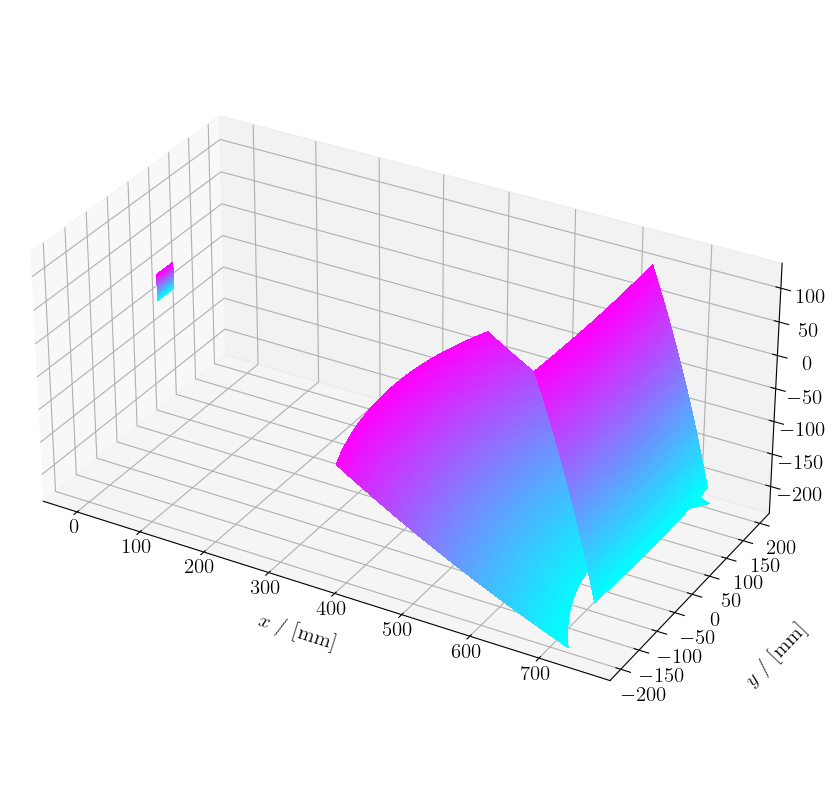

In [5]:
import numpy as np
import matplotlib.cm as cm

from PyPO.System import System

# Ellipsoidal reflector 
_A_ELLIPSE  = 3689.3421 / 2             # Semi-major axis in mm
_C_ELLIPSE  = 1836.4965 / 2             # Focii distance in mm
_B_ELLIPSE  = 3199.769638 / 2           # Semi-minor axis in mm

_A_HYPERBO  = 1226.5776 / 2             # Vertex distance in mm
_C_HYPERBO  = 2535.878 / 2              # Focii distance in mm
_B_HYPERBO  = 2219.500985 / 2           # Semi-minor axis in mm

_X_LIM_ELL  = np.array([1435, 1545])    # In frame where lower ellipse vertex is at origin
_Y_LIM_ELL  = np.array([-200, 200])

_X_LIM_HYP  = np.array([160, 480])
_Y_LIM_HYP  = np.array([-160, 160])

# First, define focii of hyperbola and ellipsoid

h_f0 = np.zeros(3) # Horizontal focus of Dragonian = lower focus of hyperboloid
h_f1 = np.array([2298.285978374926, 0.0, 1071.7083523464814]) # Upper hyperboloid focus - 
                                                              # co-incides with far ellipsoid focus

e_f0 = np.array([486.3974883317985, 0.0, 1371.340617233771]) # Upper focus of Dragonian = close ellipsoid focus
e_f1 = h_f1 # Far ellipsoid focus

e_center = (e_f1 + e_f0) / 2 
diff = (e_f1 - e_f0) / np.sqrt(np.dot(e_f1 - e_f0, e_f1 - e_f0))
theta = np.degrees(np.arccos(np.dot(np.array([1,0,0]), diff)))
#print(theta)

# Initialize system
s = System()

# Add parabolic reflector and hyperbolic reflector by focus, vertex and two foci and eccentricity
h_coeff = np.array([_B_HYPERBO, _B_HYPERBO, _A_HYPERBO])
h_gridsize = np.array([601, 401])

e_coeff = np.array([_B_ELLIPSE, _B_ELLIPSE, _A_ELLIPSE])
e_gridsize = np.array([401, 401])

h_wo = {
        "name"      : "h_wo",
        "pmode"     : "manual",
        "gmode"     : "xy",
        "coeffs"    : h_coeff,
        "flip"      : False,
        "lims_x"    : _X_LIM_HYP,
        "lims_y"    : _Y_LIM_HYP,
        "gridsize"  : h_gridsize
        }

e_wo = {
        "name"      : "e_wo",
        "pmode"     : "manual",
        "gmode"     : "xy",
        "coeffs"    : e_coeff,
        "flip"      : True,
        "lims_x"    : _X_LIM_ELL,
        "lims_y"    : _Y_LIM_ELL,
        "gridsize"  : e_gridsize
        }

s.addHyperbola(h_wo)
s.addEllipse(e_wo)

s.rotateGrids("h_wo", np.array([180, 0, 0]), pivot=np.zeros(3))
s.translateGrids("h_wo", np.array([0, 0, _C_HYPERBO]))
s.rotateGrids("h_wo", np.array([0, 65, 0]), pivot=np.zeros(3))

s.rotateGrids("e_wo", np.array([180, 90, 0]), pivot=np.zeros(3))
s.translateGrids("e_wo", e_center)
s.rotateGrids("e_wo", np.array([0, 1*theta, 0]), pivot=e_center)

# Build the plane in the horizontal focus for the source Gaussian beam.
focus1 = {
        "name"     : "focus1",
        "gmode"    : "xy",
        "lims_x"   : np.array([-20, 20]),
        "lims_y"   : np.array([-20, 20]),
        "gridsize" : np.array([101, 101])
        }

s.addPlane(focus1)

# Rotate the plane with 90 degrees around the y axis so that it faces the hyperboloid mirror.
s.rotateGrids("focus1", np.array([0, 90, 0]))

s.plotSystem()

#return s